In [2]:
# 데이터 사전처리
# 누락 데이터 처리 

# 1. 누락 데이터 확인

import pandas as pd
import seaborn as sns

In [3]:
# titanic 데이터 load

df = sns.load_dataset('titanic')
df.info()         # 데이터프레임의 데이터의 인덱스의 개수와 컬럼별 데이터의 개수 및 자료 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
# deck 컬럼에 누락 데이터가 존재하는 것을 확인
# deck 컬럼의 누락 데이터가 몇 개인지 확인 : value_counts(dropna = False)

print(df.deck.value_counts(dropna = False))     # 컬럼의 유일한 값들의 개수
                          # .values_counts() 이렇게 한다면 NaN 값을 제외하고 나옴

len(df)     # 전체 행의 개수 : 891개

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64


891

In [12]:
# 누락 데이터를 직접 찾는 방법 : .isnull(), .notnull()

print(df.head().isnull())        # null 이면 True, 아니면 False
print()
print()

print(df.head().notnull())       # null 이면 False, 아니면 True
print()

# 누락 데이터의 개수 확인
print(df.head().isnull().sum(axis = 0))           # 컬럼별 누락 데이터의 개수 합

   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  


   survived  pclass   sex   age  sibsp  parch  fare  embarked  class   who  \
0      True    True  True  True   True   True  True      True   True  True   
1      True    True  True  True   True   True  Tr

In [14]:
# isnull(), value_counts() -> 각 열의 값에 누락 변수가 몇 개씩 존재하는지 확인

miss_df = df.isnull()
miss_df

for col in miss_df.columns:
    miss_count = miss_df[col].value_counts()         # 각 열의 NaN 개수
    
    try:
        print('{} : {}'.format(col, miss_count[True]))
    except:
        print('{} : {}'.format(col, 0))

survived : 0
pclass : 0
sex : 0
age : 177
sibsp : 0
parch : 0
fare : 0
embarked : 2
class : 0
who : 0
adult_male : 0
deck : 688
embark_town : 2
alive : 0
alone : 0


In [18]:
# 누락 데이터 처리
# NaN의 데이터가 500개 이상인 컬럼을 삭제 - deck 688이므로 삭제

df_thresh = df.dropna(axis = 1, thresh = 500)    # thresh : NaN이 500이 넘는 컬럼 삭제
df_thresh.columns                    # deck 컬럼이 삭제된 자료

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [21]:
# age 컬럼에 NaN이 있는 인덱스(행) 삭제

df_age = df_thresh.dropna(axis = 0, how = 'any')

print(df_age.columns); print()

print(df_age.info())

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        712 non-null    category
 9   who          712 non-null    object  
 10  adult_male   712 non-null    bool    
 11  embark_town  712 non-null    object  
 12  alive        712 non-null    object  
 13  alone        712 non-null    bool    
dtypes: bool(2), category

In [23]:
# 누락 데이터 치환    .fillna(값, inplace = True), .fillna(method = 'ffill' 또는 'bfill')

df['age'].head(10)

# age의 누락 데이터에 age의 평균값으로 치환
df_age = df.copy()
mean_age = df['age'].mean(axis = 0)                      # 0축 = 아래로, 1축 = ->
                                                  # 그냥 무엇인가를 지워야 할 때, axis = 1 은 세로
df_age['age'].fillna(mean_age, inplace = True)    # sum, mean 등 계산을 할 때, axis = 0 이 세로 

print(df_age['age'].head(10))

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [24]:
# age를 가장 많은 나이로 변경

df_age_max = df.copy()

max_age = df_age_max['age'].max(axis = 0)           # 수정 정보를 입력

df_age_max['age'].fillna(max_age, inplace = True)   # 자료 안에 수정 정보를 추가

print(df_age_max['age'].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    80.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64


In [26]:
# embark_town : 825행부터 829행까지 정보를 확인

df['embark_town'][825 : 830]                     # 시리즈
                                                 # 정보가 int가 아닌 str

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object

In [28]:
# 가장 빈번하게 나오는 값으로 대체

most_freq = df['embark_town'].value_counts()
most_freq

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [33]:
most_freq = df['embark_town'].value_counts().idxmax()
most_freq

'Southampton'

In [34]:
most_freq = df['embark_town'].value_counts(dropna = True).idxmax()
most_freq                                # NaN값을 제외시키고 수를 세줘라. (dropna 는 True가 기본값)

'Southampton'

In [36]:
df_embark = df.copy()
df_embark['embark_town'].fillna(most_freq, inplace = True)
df_embark['embark_town'][825 : 830]  

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object

In [37]:
# 근접한 (이웃) 값으로 대체

df_embark = df.copy()
df_embark['embark_town'].fillna(method = 'ffill', inplace = True)
df_embark['embark_town'][825 : 830] 

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
Name: embark_town, dtype: object

In [48]:
df = pd.DataFrame({'c1' : ['a', 'a', 'b', 'a', 'b'],
                  'c2' : [1, 1, 1, 2, 2],
                  'c3' : [1, 1, 2, 2, 2]})

df                    # 0행과 1행이 중복

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [49]:
# 중복 데이터 확인 : .duplicated()

df.duplicated()
                      # 데이터프레임의 경우 앞에 나왔던 행 자료가 다시 나오면 True로 반환 (행 단위)

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [50]:
df['c2'].duplicated()                            # 시리즈의 경우 컬럼의 중복 확인

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool

In [51]:
# 중복 행 데이터를 제거 : .drop_duplicates()

df2 = df.drop_duplicates()
df2

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [52]:
# 컬럼을 기준으로 중복 행 제거 

df3 = df.drop_duplicates(subset = ['c2', 'c3'])
df3                             # subset으로 세부사항 조정

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


In [56]:
# titanic 데이터를 load 해서 
# age 컬럼이 NaN이면 행을 삭제
# age 컬럼을 기준으로 중복을 제거한 데이터프레임을 추출

ti = sns.load_dataset('titanic')
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [57]:
ti = ti.dropna(subset = ['age'], how = 'any', axis = 0) # inplace = True 가 들어가면 기존의 정보가 
ti.info()                                            # 변경되기 때문에 copy()가 필수

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


In [58]:
ti_age = ti.drop_duplicates(subset = ['age'])   # age 컬럼을 기준으로 나이가 같은 행을 제거
ti_age

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.00,0,0,51.8625,S,First,man,True,E,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
767,0,3,female,30.50,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,no,True
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
843,0,3,male,34.50,0,0,6.4375,C,Third,man,True,NaN,Cherbourg,no,True


In [59]:
ti_dup = ti.drop_duplicates()                   # 모든 컬럼의 값이 같은 행을 제거
ti_dup

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [63]:
# 데이터 표준화

# dataset/auto-mpg.csv 파일을 load

df = pd.read_csv('./dataset/auto-mpg.csv', header = None)

# 컬럼명을 지정

df.columns = ['mpg', 'cylinders','displacement','horsepower',
             'weight', 'aceleration','model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,aceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [65]:
# 단위 환산 -> 따로 컬럼을 추가해서 작업하는 것이 편하다.
# mpg 단위 : 갤런 /mile -> 리터 /km 

mpg_to_kpl = 1.60934 / 3.78541        # (0.425)
df['kpl'] = df['mpg'] * mpg_to_kpl
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,aceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65


In [66]:
df['kpl'] = df['kpl'].round(2)
df.head()

,mpg,cylinders,displacement,horsepower,weight,aceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.23


In [70]:
# 데이터의 자료형을 변환

print(df.dtypes); print()

df.horsepower.dtype    # 문자를 float으로 변환

# df['horsepower'] = df['horsepower'].astype('float')       # error 발생

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
aceleration     float64
model year        int64
origin            int64
name             object
kpl             float64
dtype: object



ValueError: could not convert string to float: '?'

In [71]:
# horsepower의 자료를 검색, unique()

df['horsepower'].unique()              # 데이터의 값 중에서 중복없이 하나의 값만 출력 : .unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
# '?' 문자를 처리 -> df['horsepower'] = df['horsepower'].astype('float')

# 1. 특수문자 (?, ! 등) -> NaN으로 치환
# 2. NaN 데이터의 행을 삭제
# 3. 데이터의 형을 변환

In [74]:
# 1. '?' -> numpy.nan 으로 대체 : .replace(바꿀값, 대체할 값, inplace = True)

import numpy as np

df['horsepower'].replace('?', np.nan, inplace = True)
df['horsepower'].unique()                                 # '?' 가 nan으로 변경

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [75]:
# 2. nan 데이터행을 삭제

df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
df['horsepower'].unique() 

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [77]:
# 3. 데이터타입을 'object' -> 'float'으로 변경

df['horsepower'] = df['horsepower'].astype('float')
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
aceleration     float64
model year        int64
origin            int64
name             object
kpl             float64
dtype: object

In [80]:
print(df['origin'].unique())
                                 # 여러개를 replace할 때는 딕셔너리 형태
df['origin'].replace({1 : 'USA', 2 : 'EU', 3 : 'JPN'}, inplace = True)
df['origin'].unique()                                  # 분류로 나눠진 것 = 카테고리(category)

[1 3 2]


array(['USA', 'JPN', 'EU'], dtype=object)

In [81]:
# 문자형을 범주형으로 변환

df['origin'] = df['origin'].astype('category')
print(df['origin'].dtype)

category


In [82]:
# 범주형을 문자형으로 변환

df['origin'] = df['origin'].astype('str')
print(df['origin'].dtype)

object


In [91]:
# 문) 'model year'의 데이터 타입과 데이터를 확인해보고 범주형으로 형 변환

print(df['model year'].dtype); print()           # int

print(df['model year'].unique());print()

df['model year'] = df['model year'].astype('category')
print(df['model year'].dtype)

category

[70, 71, 72, 73, 74, ..., 78, 79, 80, 81, 82]
Length: 13
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]

category


In [94]:
# np.histogram() 함수를 활용하면 각 구간의 경계선을 구할 수 있음

count, bin_dividers = np.histogram(df['horsepower'], bins = 3)     # 연속형 변수를 번주형으로 변환
print(count, bin_dividers)

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]


In [95]:
# pd.cut() 함수로 각각 데이터를 3개의 빈에 할당
# bin의 이름 정함

bin_names = ['저출력', '보통출력', '고출력']

df['hp_bin'] = pd.cut(x = df['horsepower'],       # 데이터 배열
                     bins = bin_dividers,         # 경계값 리스트
                     labels = bin_names,          # bin의 이름
                     include_lowest = True        # 첫 경계값 포함 여부
                     )

df[['horsepower', 'hp_bin']].head(15)

,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력


In [99]:
hp_dummies = pd.get_dummies(df['hp_bin'])      # 0과 1로만 데이터가 만들어짐
hp_dummies.head(15)

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [108]:
# 머신러닝 분석을 위한 라이브러리 sklearn, 딥러닝 tensorflow의 keras

from sklearn import preprocessing         # 전처리 모듈

# 전처리를 위한 encoder
label_encoder = preprocessing.LabelEncoder()   # 클래스 instance 생성 label encoder
onehot_encoder = preprocessing.OneHotEncoder()  # onehot encoder 생성

# lavel encoder 로 문자형 범주를 숫자형 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'].head(15))

print(onehot_labeled); print()        # [1 1 1 1 1 0 0 0 0 0 0 1 1 0 2]

# 2차원 배열로 변환
onehot_reshape = onehot_labeled.reshape(len(onehot_labeled), 1)
print(onehot_reshape); print()

# 희소행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(onehot_reshape)
print(onehot_fitted)

[1 1 1 1 1 0 0 0 0 0 0 1 1 0 2]

[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]]

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0


In [109]:
# 정규화 : 모든 실수를 0 ~ 1 또는 -1 ~ 1 사이의 수로 변환해주는 작업

# 해당 열의 최대값으로 모든 데이터를 나누어 저장

df['h_1'] = df.horsepower / abs(df.horsepower.max())       # abs = 절댓값
df[['horsepower', 'h_1']]

,horsepower,h_1
0,130.0,0.565217
1,165.0,0.717391
2,150.0,0.652174
3,150.0,0.652174
4,140.0,0.608696
...,...,...
393,86.0,0.373913
394,52.0,0.226087
395,84.0,0.365217
396,79.0,0.343478


In [110]:
# 해당 열의 (최대값 - 최소값) 으로 모든 데이터를 나누어 저장

df['h_1'] = df.horsepower / (df.horsepower.max() - df.horsepower.min())
df[['horsepower', 'h_1']]

,horsepower,h_1
0,130.0,0.706522
1,165.0,0.896739
2,150.0,0.815217
3,150.0,0.815217
4,140.0,0.760870
...,...,...
393,86.0,0.467391
394,52.0,0.282609
395,84.0,0.456522
396,79.0,0.429348


In [3]:
# 시계열 데이터

df = pd.read_csv('./dataset/stock-data.csv')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [4]:
# Date 컬럼의 자료를 new_Date 로 datetime 형식으로

df['new_Date'] = pd.to_datetime(df['Date'])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB
None


,Date,Close,Start,High,Low,Volume,new_Date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


In [5]:
# new_Date 컬럼을 인덱스로 설정
# Date 컬럼 삭제

df.set_index('new_Date', inplace = True)
df.drop('Date', axis = 1, inplace = True)
print(df.head())
df.info()

            Close  Start   High    Low  Volume
new_Date                                      
2018-07-02  10100  10850  10900  10000  137977
2018-06-29  10700  10550  10900   9990  170253
2018-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2018-06-26  10800  10900  11000  10700   63039
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-07-02 to 2018-06-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   20 non-null     int64
 1   Start   20 non-null     int64
 2   High    20 non-null     int64
 3   Low     20 non-null     int64
 4   Volume  20 non-null     int64
dtypes: int64(5)
memory usage: 960.0 bytes


<AxesSubplot:xlabel='new_Date'>

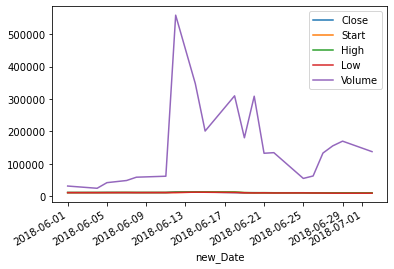

In [6]:
df.plot()

In [10]:
dates = ['2019-01-01', '2020-03-01', '2021-06-01']

# str 을 timestamp로 변환 : datetime

ts_dates = pd.to_datetime(dates)

ts_day = ts_dates.to_period(freq = 'A')    # freq = 'D' 날짜, 'M' 월, 'A' 연도
ts_day

PeriodIndex(['2019', '2020', '2021'], dtype='period[A-DEC]')

In [14]:
# 날짜를 분리

df = pd.read_csv('./dataset/stock-data.csv')

df['new_Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Close,Start,High,Low,Volume,new_Date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


In [17]:
# 데이터가 datetime 형식일 떼 : dt.year, dt.month, dt.day

df['year'] = df['new_Date'].dt.year
df['month'] = df['new_Date'].dt.month
df['day'] = df['new_Date'].dt.day
df.head()

,Date,Close,Start,High,Low,Volume,new_Date,year,month,day
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26


In [18]:
# 종가, 시작가, 연, 월, 일, new_Date만 추출 -> df_stock에 저장, new_Date를 인덱스로 설정

df.head()

,Date,Close,Start,High,Low,Volume,new_Date,year,month,day
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26


In [19]:
df_stock = df.loc[:, ['Close', 'Start', 'year', 'month', 'day', 'new_Date']]
df_stock.set_index('new_Date', inplace = True)
df_stock.head()

,Close,Start,year,month,day
new_Date,,,,,
2018-07-02,10100,10850,2018,7,2
2018-06-29,10700,10550,2018,6,29
2018-06-28,10400,10900,2018,6,28
2018-06-27,10900,10800,2018,6,27
2018-06-26,10800,10900,2018,6,26
